# Importar bibliotecas

In [2]:
import os
import pandas as pd
import time
from tqdm import tqdm

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# Importar dados

In [3]:

data_folder = '/home/andre/unicamp/ini_cien/intrusion_detection_RFL/data/processed_data/current_testing'


paths = ['x_one_train.csv', 'y_one_train.csv','x_one_test.csv','y_one_test.csv'] 

dfs_one = []
for path in paths:
    dfs_one.append(pd.read_csv(os.path.join(data_folder,path)))

paths = ['x_mul_train.csv','y_mul_train.csv','x_mul_test.csv','y_mul_test.csv']
dfs_mul = []
for path in paths:
    dfs_mul.append(pd.read_csv(os.path.join(data_folder,path)))

paths = ['x_sur_test.csv','y_sur_test.csv']
dfs_sur = []
for path in paths:
    dfs_sur.append(pd.read_csv(os.path.join(data_folder,path)))
      


# Analise

## Instanciar classificadores

In [4]:
classificadores_one = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(),
}

In [5]:
one_results = pd.DataFrame()
one_results['algoritmos'] = classificadores_one.keys()
one_results.head(7)


,algoritmos
0,Logistic Regression
1,XGBoost


In [6]:
eval_set = [(dfs_one[0], dfs_one[1]), (dfs_one[2], dfs_one[3])]

In [7]:
tempo_treinamento = []
for clf in tqdm(classificadores_one.keys(), desc="Classifiers"):
    inicio = time.time()
    if clf == 'XGBoost':
        classificadores_one[clf].fit(dfs_one[0], dfs_one[1].values.ravel(), eval_set=eval_set, verbose=True)
    else:
        classificadores_one[clf].fit(dfs_one[0], dfs_one[1].values.ravel())
    fim = time.time()
    tempo_treinamento.append(fim - inicio)
one_results['tempo_treinamento'] = tempo_treinamento
one_results.head(7)


Classifiers:  50%|█████     | 1/2 [00:00<00:00,  5.59it/s]

[0]	validation_0-logloss:0.48602	validation_1-logloss:0.51077
[1]	validation_0-logloss:0.36836	validation_1-logloss:0.41191
[2]	validation_0-logloss:0.29347	validation_1-logloss:0.37716
[3]	validation_0-logloss:0.22555	validation_1-logloss:0.37978
[4]	validation_0-logloss:0.17945	validation_1-logloss:0.35752
[5]	validation_0-logloss:0.14789	validation_1-logloss:0.33535
[6]	validation_0-logloss:0.12804	validation_1-logloss:0.35423
[7]	validation_0-logloss:0.11173	validation_1-logloss:0.38968
[8]	validation_0-logloss:0.09941	validation_1-logloss:0.40548
[9]	validation_0-logloss:0.08926	validation_1-logloss:0.42007
[10]	validation_0-logloss:0.08201	validation_1-logloss:0.42099
[11]	validation_0-logloss:0.07774	validation_1-logloss:0.42203
[12]	validation_0-logloss:0.07059	validation_1-logloss:0.42115
[13]	validation_0-logloss:0.06805	validation_1-logloss:0.43428
[14]	validation_0-logloss:0.06365	validation_1-logloss:0.44296
[15]	validation_0-logloss:0.05976	validation_1-logloss:0.44793
[1

Classifiers: 100%|██████████| 2/2 [00:04<00:00,  2.25s/it]


,algoritmos,tempo_treinamento
0,Logistic Regression,0.178814
1,XGBoost,4.323981


In [8]:
classificadores_mul = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost' : XGBClassifier(objective='multi:softmax')
}


In [9]:
mul_results = pd.DataFrame()
mul_results['algoritmos'] = classificadores_mul.keys()
mul_results.head(7)

,algoritmos
0,Logistic Regression
1,XGBoost


In [10]:
eval_set = [(dfs_mul[0], dfs_mul[1]), (dfs_mul[2], dfs_mul[3])]

In [11]:
tempo_treinamento = []
for clf in tqdm(classificadores_mul.keys(), desc="Classifiers"):
    inicio = time.time()
    if clf == 'XGBoost':
        classificadores_mul[clf].fit(dfs_mul[0], dfs_mul[1].values.ravel(), eval_set=eval_set, verbose=True)
    else:
        classificadores_mul[clf].fit(dfs_mul[0], dfs_mul[1].values.ravel())
    fim = time.time()
    tempo_treinamento.append(fim - inicio)
mul_results['tempo_treinamento'] = tempo_treinamento
mul_results.head(7)

Classifiers:  50%|█████     | 1/2 [00:01<00:01,  1.27s/it]

[0]	validation_0-mlogloss:1.04449	validation_1-mlogloss:2.04689
[1]	validation_0-mlogloss:0.71259	validation_1-mlogloss:2.05860
[2]	validation_0-mlogloss:0.50906	validation_1-mlogloss:2.06916
[3]	validation_0-mlogloss:0.37153	validation_1-mlogloss:2.09188
[4]	validation_0-mlogloss:0.27510	validation_1-mlogloss:2.10779
[5]	validation_0-mlogloss:0.20571	validation_1-mlogloss:2.14612
[6]	validation_0-mlogloss:0.15486	validation_1-mlogloss:2.17048
[7]	validation_0-mlogloss:0.11759	validation_1-mlogloss:2.21388
[8]	validation_0-mlogloss:0.09003	validation_1-mlogloss:2.25665
[9]	validation_0-mlogloss:0.06933	validation_1-mlogloss:2.30757
[10]	validation_0-mlogloss:0.05422	validation_1-mlogloss:2.37372
[11]	validation_0-mlogloss:0.04283	validation_1-mlogloss:2.43230
[12]	validation_0-mlogloss:0.03427	validation_1-mlogloss:2.46934
[13]	validation_0-mlogloss:0.02781	validation_1-mlogloss:2.50712
[14]	validation_0-mlogloss:0.02305	validation_1-mlogloss:2.52854
[15]	validation_0-mlogloss:0.01936	

Classifiers: 100%|██████████| 2/2 [00:10<00:00,  5.25s/it]


,algoritmos,tempo_treinamento
0,Logistic Regression,1.269669
1,XGBoost,9.221719


In [12]:
mul_results['tempo_treinamento'] = tempo_treinamento
mul_results.head(7)

,algoritmos,tempo_treinamento
0,Logistic Regression,1.269669
1,XGBoost,9.221719


## Avaliacao

### One attacks

In [14]:
acc_one  = []
prec_one = []
rec_one  = []
loss_one = []
time_one = []

for clf in tqdm(classificadores_one.keys(), desc="Classifiers"):
    
    start_time = time.process_time()
    predicoes = classificadores_one[clf].predict(dfs_one[2])
    # Predict probabilities for the positive class
    pred_probs = classificadores_one[clf].predict_proba(dfs_one[2])[:, 1]
    time_one.append(time.process_time() - start_time)
    
    acc_one.append(accuracy_score(dfs_one[3],predicoes))
    prec_one.append(precision_score(dfs_one[3],predicoes,average='macro'))
    rec_one.append(recall_score(dfs_one[3],predicoes,average='macro'))
    loss_one.append(log_loss(dfs_one[3],pred_probs))
    
one_results['accuracy']        = acc_one
one_results['precision']       = prec_one
one_results['recall']          = rec_one
one_results['tempo_predicoes'] = time_one
one_results['log_loss']        = loss_one

one_results.head(7)

Classifiers: 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]


,algoritmos,tempo_treinamento,accuracy,precision,recall,tempo_predicoes,log_loss
0,Logistic Regression,0.178814,0.749944,0.754741,0.749944,0.020819,0.756142
1,XGBoost,4.323981,0.718667,0.807018,0.718667,0.397183,1.105067


### Multiple Attacks

In [20]:
acc_mul  = []
prec_mul = []
rec_mul  = []
loss_mul = []
time_mul = []

for clf in tqdm(classificadores_mul.keys(), desc="Classifiers"):
    start_time = time.process_time()
    predicoes = classificadores_mul[clf].predict(dfs_mul[2])
    # Predict probabilities for the positive class
    pred_probs = classificadores_mul[clf].predict_proba(dfs_mul[2])
    time_mul.append(time.process_time() - start_time)
    
    acc_mul.append(accuracy_score(dfs_mul[3], predicoes))
    prec_mul.append(precision_score(dfs_mul[3], predicoes, average='macro', zero_division=0))
    rec_mul.append(recall_score(dfs_mul[3], predicoes, average='macro'))
    loss_mul.append(log_loss(dfs_mul[3], pred_probs))

mul_results['accuracy']        = acc_mul
mul_results['precision']       = prec_mul
mul_results['recall']          = rec_mul
mul_results['log_loss']        = loss_mul
mul_results['tempo_predicoes'] = time_mul

mul_results.head(7)

Classifiers:   0%|          | 0/2 [00:00<?, ?it/s]

/home/andre/miniconda3/envs/stable-baseline/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
Classifiers: 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]


,algoritmos,tempo_treinamento,accuracy,precision,recall,log_loss,tempo_predicoes
0,Logistic Regression,1.269669,0.396247,0.436365,0.396938,2.756788,0.187242
1,XGBoost,9.221719,0.333023,0.272210,0.355645,3.271473,3.763312


### Surprise Attacks

In [21]:
sur_results = pd.DataFrame()
sur_results['algoritmos'] = classificadores_one.keys()

acc_sur  = []
prec_sur = []
rec_sur  = []
time_sur = []

for clf in tqdm(classificadores_one.keys(), desc="Classifiers"):
    
    start_time = time.process_time()
    predicoes = classificadores_one[clf].predict(dfs_sur[0])
    time_sur.append(time.process_time() - start_time)
    
    acc_sur.append(accuracy_score(dfs_sur[1],predicoes))
    prec_sur.append(precision_score(dfs_sur[1],predicoes,average='macro'))
    rec_sur.append(recall_score(dfs_sur[1],predicoes,average='macro'))
    
sur_results['accuracy']        = acc_sur
sur_results['precision']       = prec_sur
sur_results['recall']          = rec_sur
sur_results['tempo_predicoes'] = time_sur

sur_results.head(7)

Classifiers:   0%|          | 0/2 [00:00<?, ?it/s]/home/andre/miniconda3/envs/stable-baseline/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Classifiers:  50%|█████     | 1/2 [00:00<00:00,  8.85it/s]/home/andre/miniconda3/envs/stable-baseline/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Classifiers: 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]


,algoritmos,accuracy,precision,recall,tempo_predicoes
0,Logistic Regression,0.369591,0.5,0.184796,0.015311
1,XGBoost,0.428401,0.5,0.214200,0.132404


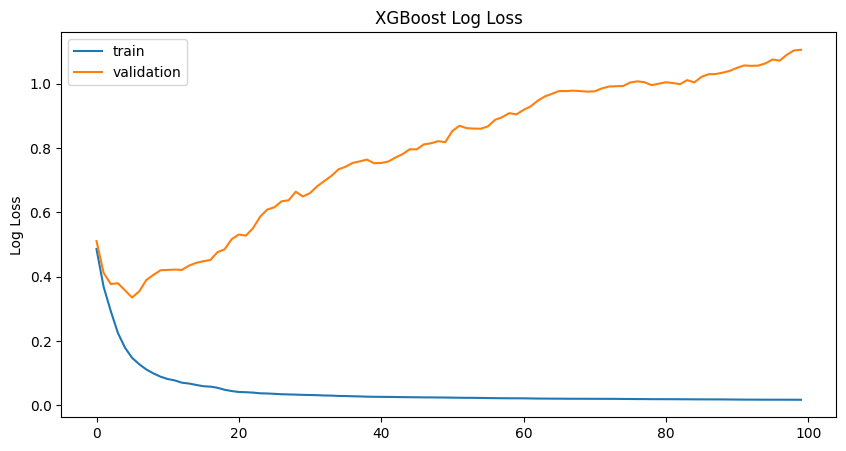

In [22]:
results = classificadores_one['XGBoost'].evals_result()
plt.figure(figsize=(10, 5))
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='validation')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.savefig(os.path.join("/home/andre/unicamp/ini_cien/intrusion_detection_RFL/data/plots/one", 'xg-boost-central.png'))
plt.show()

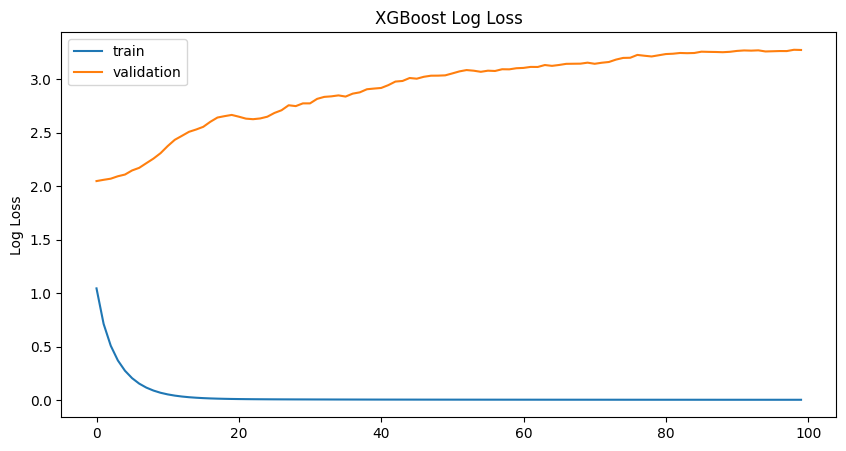

In [23]:
results = classificadores_mul['XGBoost'].evals_result()
plt.figure(figsize=(10, 5))
plt.plot(results['validation_0']['mlogloss'], label='train')
plt.plot(results['validation_1']['mlogloss'], label='validation')
plt.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.savefig(os.path.join("/home/andre/unicamp/ini_cien/intrusion_detection_RFL/data/plots/mul", 'xg-boost-central.png'))
plt.show()  

## Comparar

<Axes: xlabel='recall', ylabel='algoritmos'>

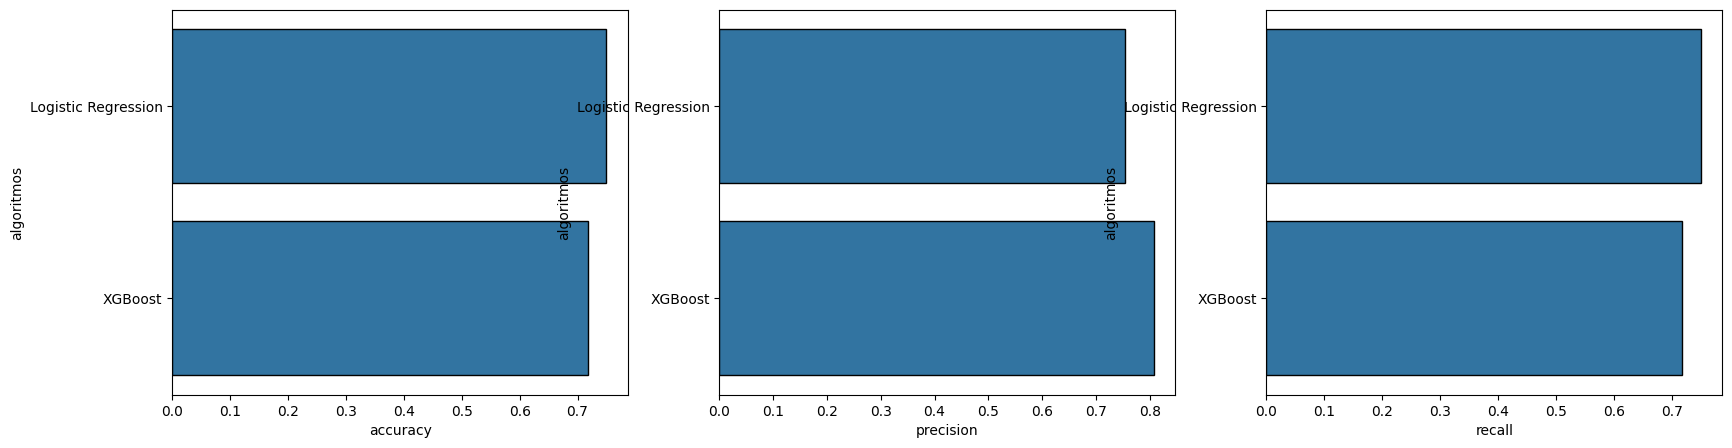

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

sns.barplot(y='algoritmos', x='accuracy', data=one_results, ax=ax[0],ec='k',orient='h')
sns.barplot(y='algoritmos', x='precision', data=one_results, ax=ax[1],ec='k',orient='h')
sns.barplot(y='algoritmos', x='recall', data=one_results, ax=ax[2],ec='k',orient='h')

<Axes: xlabel='recall', ylabel='algoritmos'>

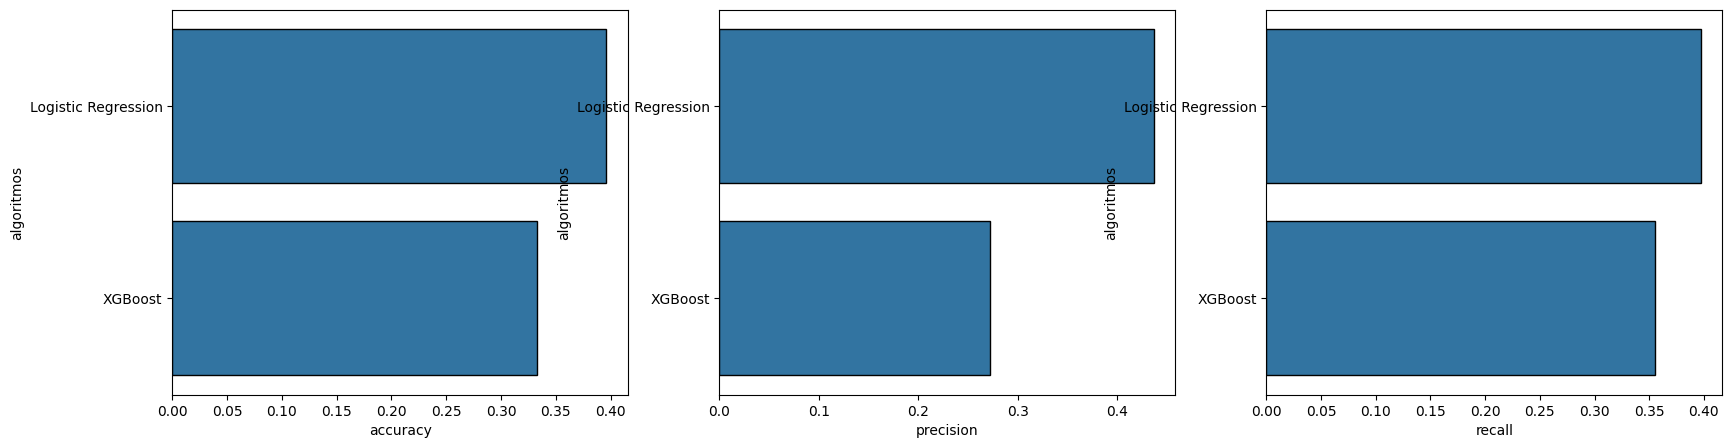

In [25]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

sns.barplot(y='algoritmos', x='accuracy', data=mul_results, ax=ax[0],ec='k',orient='h')
sns.barplot(y='algoritmos', x='precision', data=mul_results, ax=ax[1],ec='k',orient='h')
sns.barplot(y='algoritmos', x='recall', data=mul_results, ax=ax[2],ec='k',orient='h')

<Axes: xlabel='recall', ylabel='algoritmos'>

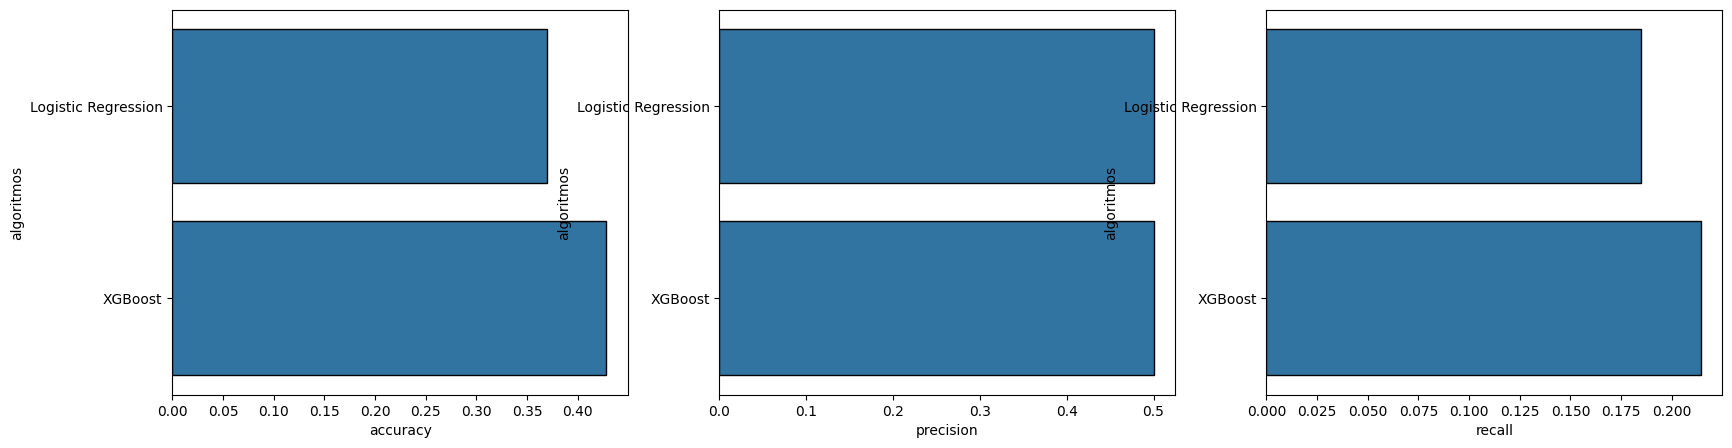

In [26]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))

sns.barplot(y='algoritmos', x='accuracy', data=sur_results, ax=ax[0],ec='k',orient='h')
sns.barplot(y='algoritmos', x='precision', data=sur_results, ax=ax[1],ec='k',orient='h')
sns.barplot(y='algoritmos', x='recall', data=sur_results, ax=ax[2],ec='k',orient='h')

## Matriz de confusão

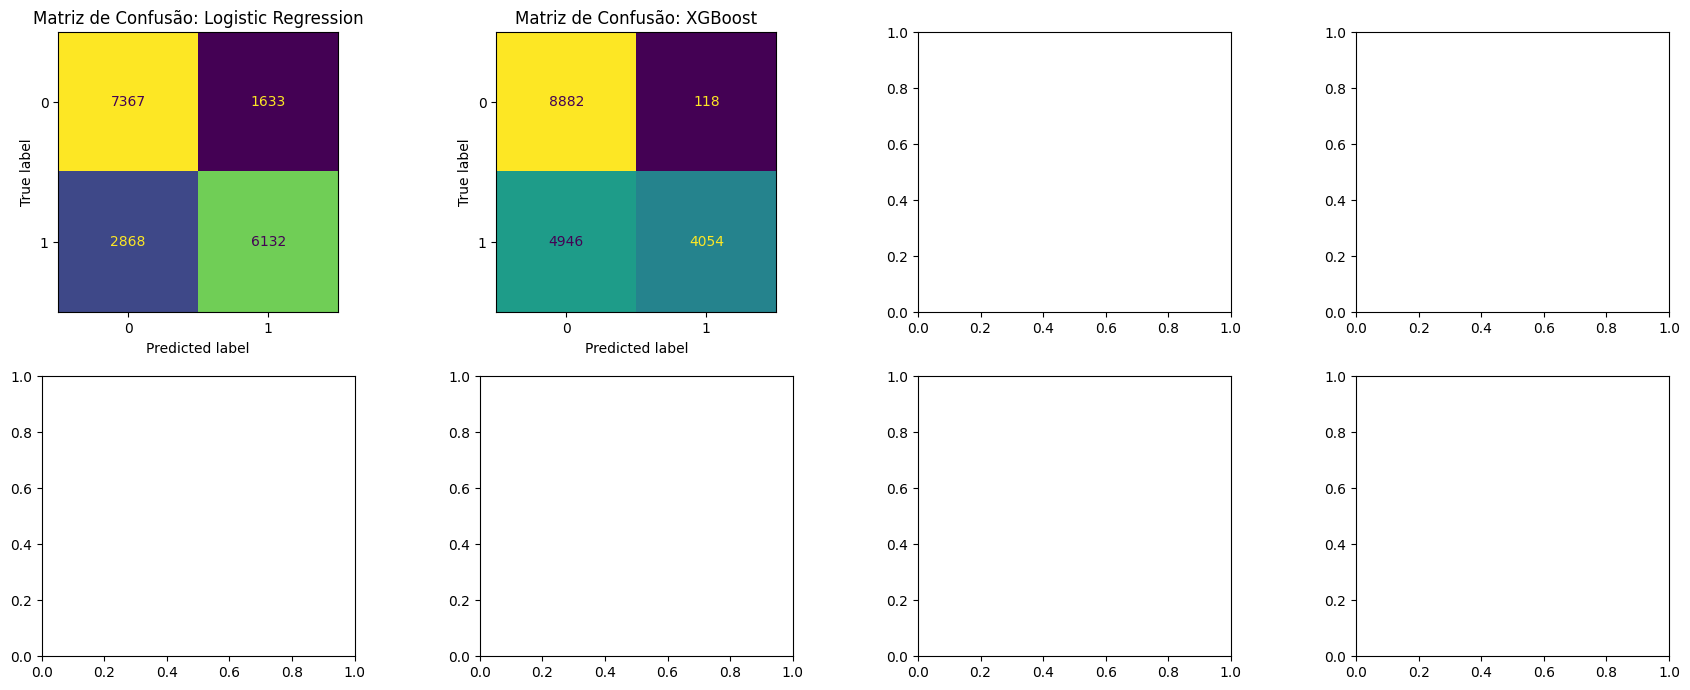

In [27]:
fig, ax = plt.subplots(nrows=2, ncols= 4, figsize=(17,7))

for idx,clf in enumerate(classificadores_one.keys()):
    cf_matrix = confusion_matrix(dfs_one[3],classificadores_one[clf].predict(dfs_one[2]))
    disp      = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=ax[idx//4][idx%4],colorbar=False)
    ax[idx//4][idx%4].set_title(f"Matriz de Confusão: {clf}")


plt.tight_layout()
fig.subplots_adjust(wspace=0.4)  # Adjust wspace to increase horizontal space between subplots

plt.show()


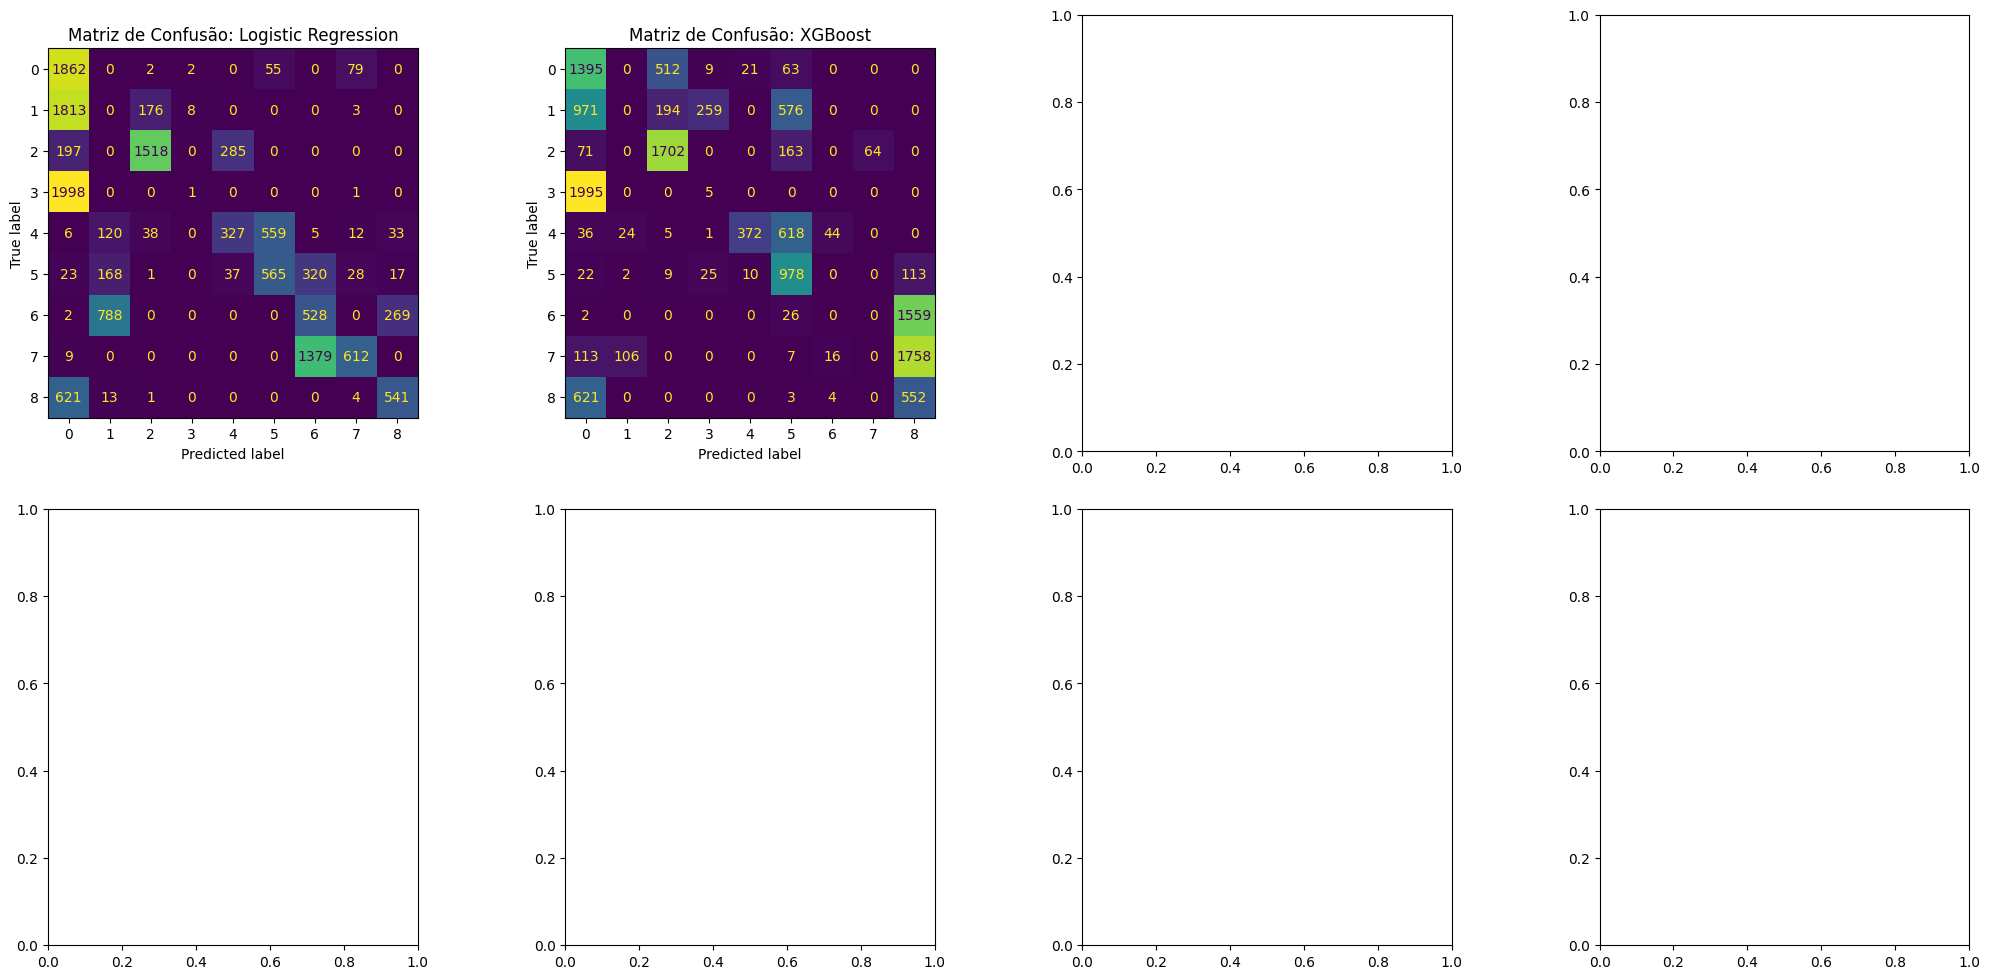

In [28]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

for idx,clf in enumerate(classificadores_mul.keys()):
    cf_matrix = confusion_matrix(dfs_mul[3],classificadores_mul[clf].predict(dfs_mul[2]))
    disp      = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=ax[idx//4][idx%4],colorbar=False)
    ax[idx//4][idx%4].set_title(f"Matriz de Confusão: {clf}")

plt.tight_layout()
fig.subplots_adjust(wspace=0.4)  # Adjust wspace to increase horizontal space between subplots

plt.show()

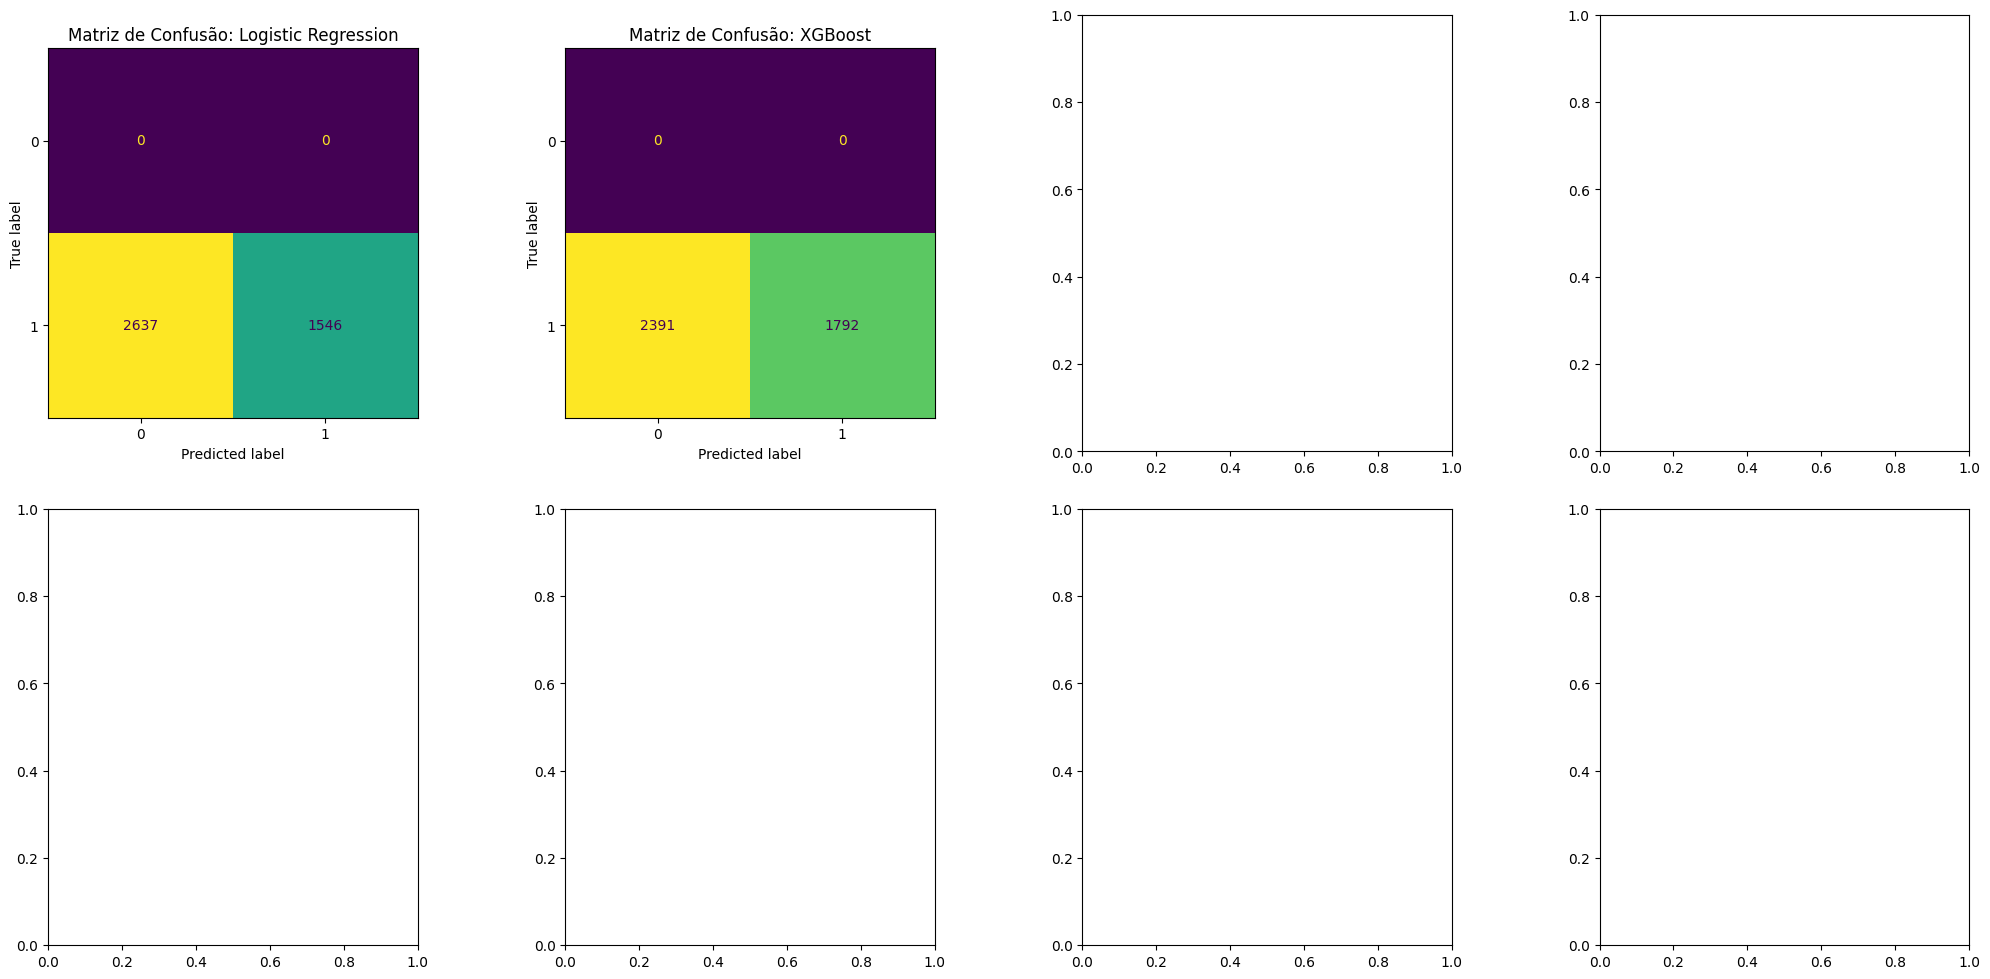

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

for idx,clf in enumerate(classificadores_mul.keys()):
    cf_matrix = confusion_matrix(dfs_sur[1],classificadores_one[clf].predict(dfs_sur[0]))
    disp      = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=ax[idx//4][idx%4],colorbar=False)
    ax[idx//4][idx%4].set_title(f"Matriz de Confusão: {clf}")

plt.tight_layout()
fig.subplots_adjust(wspace=0.4)  # Adjust wspace to increase horizontal space between subplots

plt.show()

## Salvar resultados

In [33]:
one_results

,algoritmos,tempo_treinamento,accuracy,precision,recall,tempo_predicoes,log_loss
0,Logistic Regression,0.178814,0.749944,0.754741,0.749944,0.020819,0.756142
1,XGBoost,4.323981,0.718667,0.807018,0.718667,0.397183,1.105067


In [48]:

for df, name in ((one_results, "one"), (mul_results, "mul")):
    results_directory = '/home/andre/unicamp/ini_cien/intrusion_detection_RFL/data/plots/' + name 
    results_file = os.path.join(results_directory, 'results.csv')
    results = pd.read_csv(results_file)
    for index, row in df.iterrows():
        model_info = {
            'Model Name': row['algoritmos'],
            'Loss': row['log_loss'],
            'Accuracy': row['accuracy'],
        }
        print(model_info)
        new_row_df = pd.DataFrame([model_info])
        results = pd.concat([results, new_row_df], ignore_index=True)
    results.to_csv(results_file, index=False)


{'Model Name': 'Logistic Regression', 'Loss': 0.7561422653935285, 'Accuracy': 0.7499444444444444}
{'Model Name': 'XGBoost', 'Loss': 1.1050673233306774, 'Accuracy': 0.7186666666666667}
{'Model Name': 'Logistic Regression', 'Loss': 2.7567876432154135, 'Accuracy': 0.3962465060561693}
{'Model Name': 'XGBoost', 'Loss': 3.271472504708748, 'Accuracy': 0.3330227605483828}
